# Sparse Autoencoder Neural Networks — How to Utilise Sparsity for Robust Information Encoding
Reference:
* https://towardsdatascience.com/sparse-autoencoder-neural-networks-how-to-utilise-sparsity-for-robust-information-encoding-6aa9ff542bc9

In [1]:
# pip install keras==2.4.0 for tensorflow 2.4.0, refer to https://mckayward.github.io/floyd-docs/guides/environments/
# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for adding Dense layers to AE model
from keras.models import Model # for creating a Neural Network Autoencoder model

# Data manipulation
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

# Visualization
import matplotlib 
import matplotlib.pyplot as plt # for plotting model loss
print('matplotlib: %s' % matplotlib.__version__) # print version
import seaborn as sns # for plotting neuron heatmap
print('seaborn: %s' % sns.__version__) # print version

# Other utilities
import sys
import os

# Assign main directory to a variable
main_dir=os.path.dirname(sys.path[0])

2022-05-04 16:18:33.927831: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.2


Tensorflow/Keras: 2.4.0
numpy: 1.19.2


Using TensorFlow backend.


matplotlib: 3.5.1
seaborn: 0.11.2


Shape of X_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of X_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


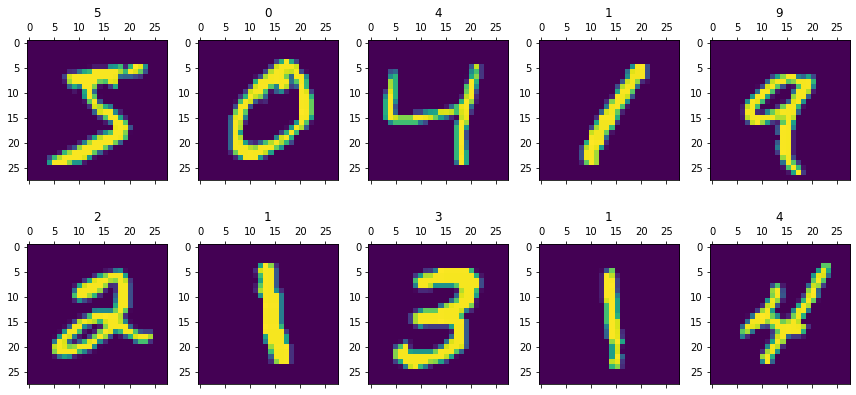

In [2]:
# Load digits data 
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Print shapes
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

# Display images of the first 10 digits in the training set and their true lables
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(X_train[n])
        axs[i,j].set(title=y_train[n])
        n=n+1
plt.show() 

In [3]:
# Reshape and normalize (divide by 255) input data
X_train = X_train.reshape(60000, 784).astype("float32") / 255
X_test = X_test.reshape(10000, 784).astype("float32") / 255

# Print shapes
print("New shape of X_train: ", X_train.shape)
print("New shape of X_test: ", X_test.shape)

New shape of X_train:  (60000, 784)
New shape of X_test:  (10000, 784)


## UAE

2022-05-04 16:18:37.811863: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-05-04 16:18:37.812902: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-05-04 16:18:37.893793: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:05:00.0 name: GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.62GHz coreCount: 28 deviceMemorySize: 10.91GiB deviceMemoryBandwidth: 451.17GiB/s
2022-05-04 16:18:37.894925: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:06:00.0 name: GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.62GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-05-04 16:18:37.896045: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 2 with properties: 
pciBusID: 0000:09:00.0 name: GeForc

Model: "Autoencoder-Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
AE-Input-Layer (InputLayer)  [(None, 784)]             0         
_________________________________________________________________
AE-Encoder-Hidden-Layer (Den (None, 16)                12560     
_________________________________________________________________
AE-Bottleneck-Layer (Dense)  (None, 16)                272       
_________________________________________________________________
AE-Decoder-Hidden-Layer (Den (None, 16)                272       
_________________________________________________________________
AE-Output-Layer (Dense)      (None, 784)               13328     
Total params: 26,432
Trainable params: 26,432
Non-trainable params: 0
_________________________________________________________________
None


2022-05-04 16:18:41.269586: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-05-04 16:18:41.291821: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2998380000 Hz


Epoch 1/50


2022-05-04 16:18:41.638600: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


3750/3750 [==============================] - 9s 2ms/step - loss: 0.0584 - val_loss: 0.0329
Epoch 2/50
3750/3750 [==============================] - 8s 2ms/step - loss: 0.0318 - val_loss: 0.0281
Epoch 3/50
3750/3750 [==============================] - 8s 2ms/step - loss: 0.0281 - val_loss: 0.0270
Epoch 4/50
3750/3750 [==============================] - 8s 2ms/step - loss: 0.0271 - val_loss: 0.0263
Epoch 5/50
3750/3750 [==============================] - 8s 2ms/step - loss: 0.0267 - val_loss: 0.0261
Epoch 6/50
3750/3750 [==============================] - 8s 2ms/step - loss: 0.0264 - val_loss: 0.0258
Epoch 7/50
3750/3750 [==============================] - 8s 2ms/step - loss: 0.0261 - val_loss: 0.0251
Epoch 8/50
3750/3750 [==============================] - 8s 2ms/step - loss: 0.0254 - val_loss: 0.0249
Epoch 9/50
3750/3750 [==============================] - 8s 2ms/step - loss: 0.0252 - val_loss: 0.0247
Epoch 10/50
3750/3750 [==============================] - 8s 2ms/step - loss: 0.0252 - val_los

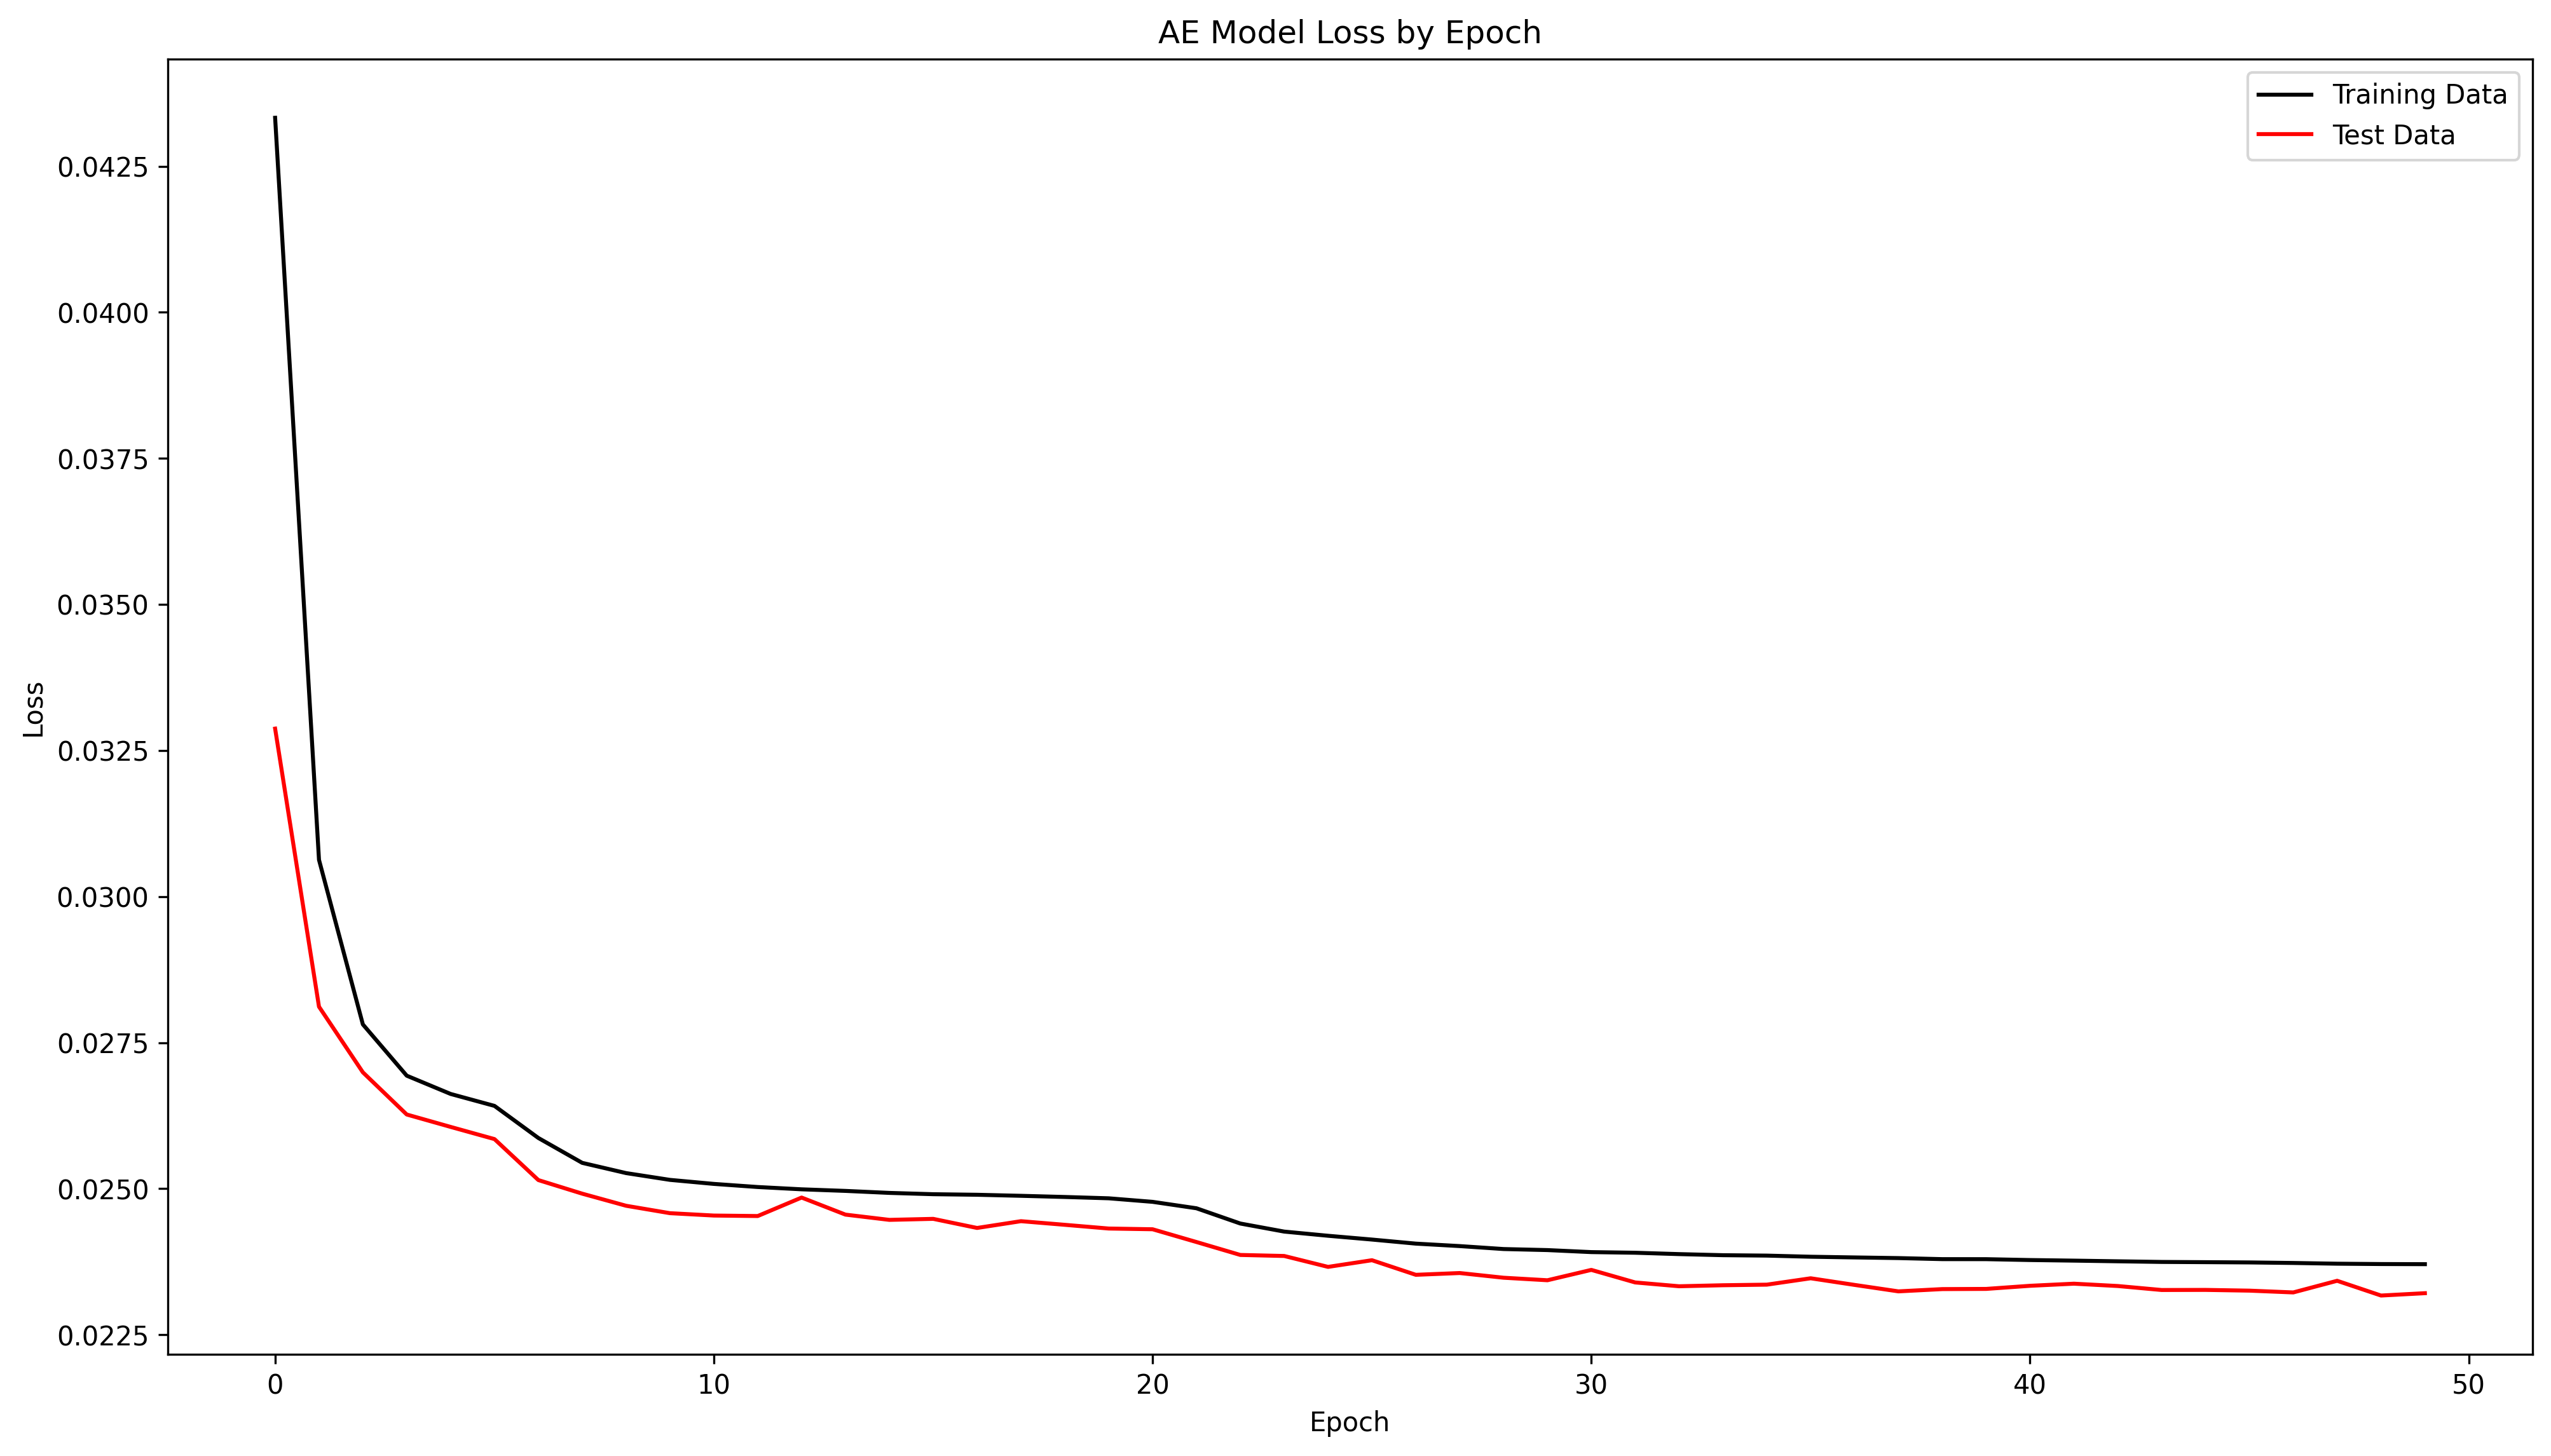

In [4]:
#----------- Build AE Model ----------#

# Shapes
AE_n_inputs=X_train.shape[1] #--- No. of neurons for the input and output layers
AE_n_hidden=16 #--- No. of neurons for the hidden layers (including bottleneck)

# Layers
AE_visible = Input(shape=(AE_n_inputs,), name='AE-Input-Layer') #--- Input-Layer 
AE_enc_hidden = Dense(units=AE_n_hidden, activation='relu', name='AE-Encoder-Hidden-Layer')(AE_visible) #--- Encoder-Hidden-Layer 
AE_bottleneck = Dense(units=AE_n_hidden, activation='relu', name='AE-Bottleneck-Layer')(AE_enc_hidden) #--- Bottleneck-Layer
AE_dec_hidden = Dense(units=AE_n_hidden, activation='relu', name='AE-Decoder-Hidden-Layer')(AE_bottleneck) #--- Decoder-Hidden-Layer 
AE_output = Dense(units=AE_n_inputs, activation='sigmoid', name='AE-Output-Layer')(AE_dec_hidden) #--- Output-Layer

# Define autoencoder model
AE_model = Model(inputs=AE_visible, outputs=AE_output, name='Autoencoder-Model')

# Compile autoencoder model
AE_model.compile(optimizer='adam', loss='mse')

# Print model summary
print(AE_model.summary())

# Fit the autoencoder model to reconstruct input
AE_history = AE_model.fit(X_train, X_train, epochs=50, batch_size=16, verbose=1, validation_data=(X_test, X_test))

#---------- Plot a loss chart ----------#
fig, ax = plt.subplots(figsize=(16,9), dpi=300)
plt.title(label='AE Model Loss by Epoch', loc='center')
ax.plot(AE_history.history['loss'], label='Training Data', color='black')
ax.plot(AE_history.history['val_loss'], label='Test Data', color='red')
ax.set(xlabel='Epoch', ylabel='Loss')
plt.legend()
plt.show()

#----------- Save AE Encoder Model ----------#

# Define an encoder model without the decoder
AE_encoder = Model(inputs=AE_visible, outputs=AE_bottleneck)

# Compile encoder model
AE_encoder.compile(optimizer='adam', loss='mse')

# Save the encoder model to file
AE_encoder.save(main_dir+'/data/AE_encoder.h5')

## SAE

Model: "Sparse-Autoencoder-Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
SAE-Input-Layer (InputLayer) [(None, 784)]             0         
_________________________________________________________________
SAE-Encoder-Hidden-Layer (De (None, 16)                12560     
_________________________________________________________________
SAE-Bottleneck-Layer (Dense) (None, 16)                272       
_________________________________________________________________
SAE-Decoder-Hidden-Layer (De (None, 16)                272       
_________________________________________________________________
SAE-Output-Layer (Dense)     (None, 784)               13328     
Total params: 26,432
Trainable params: 26,432
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
3750/3750 [==============================] - 8s 2ms/step - loss: 0.0665 - val_loss: 0.03

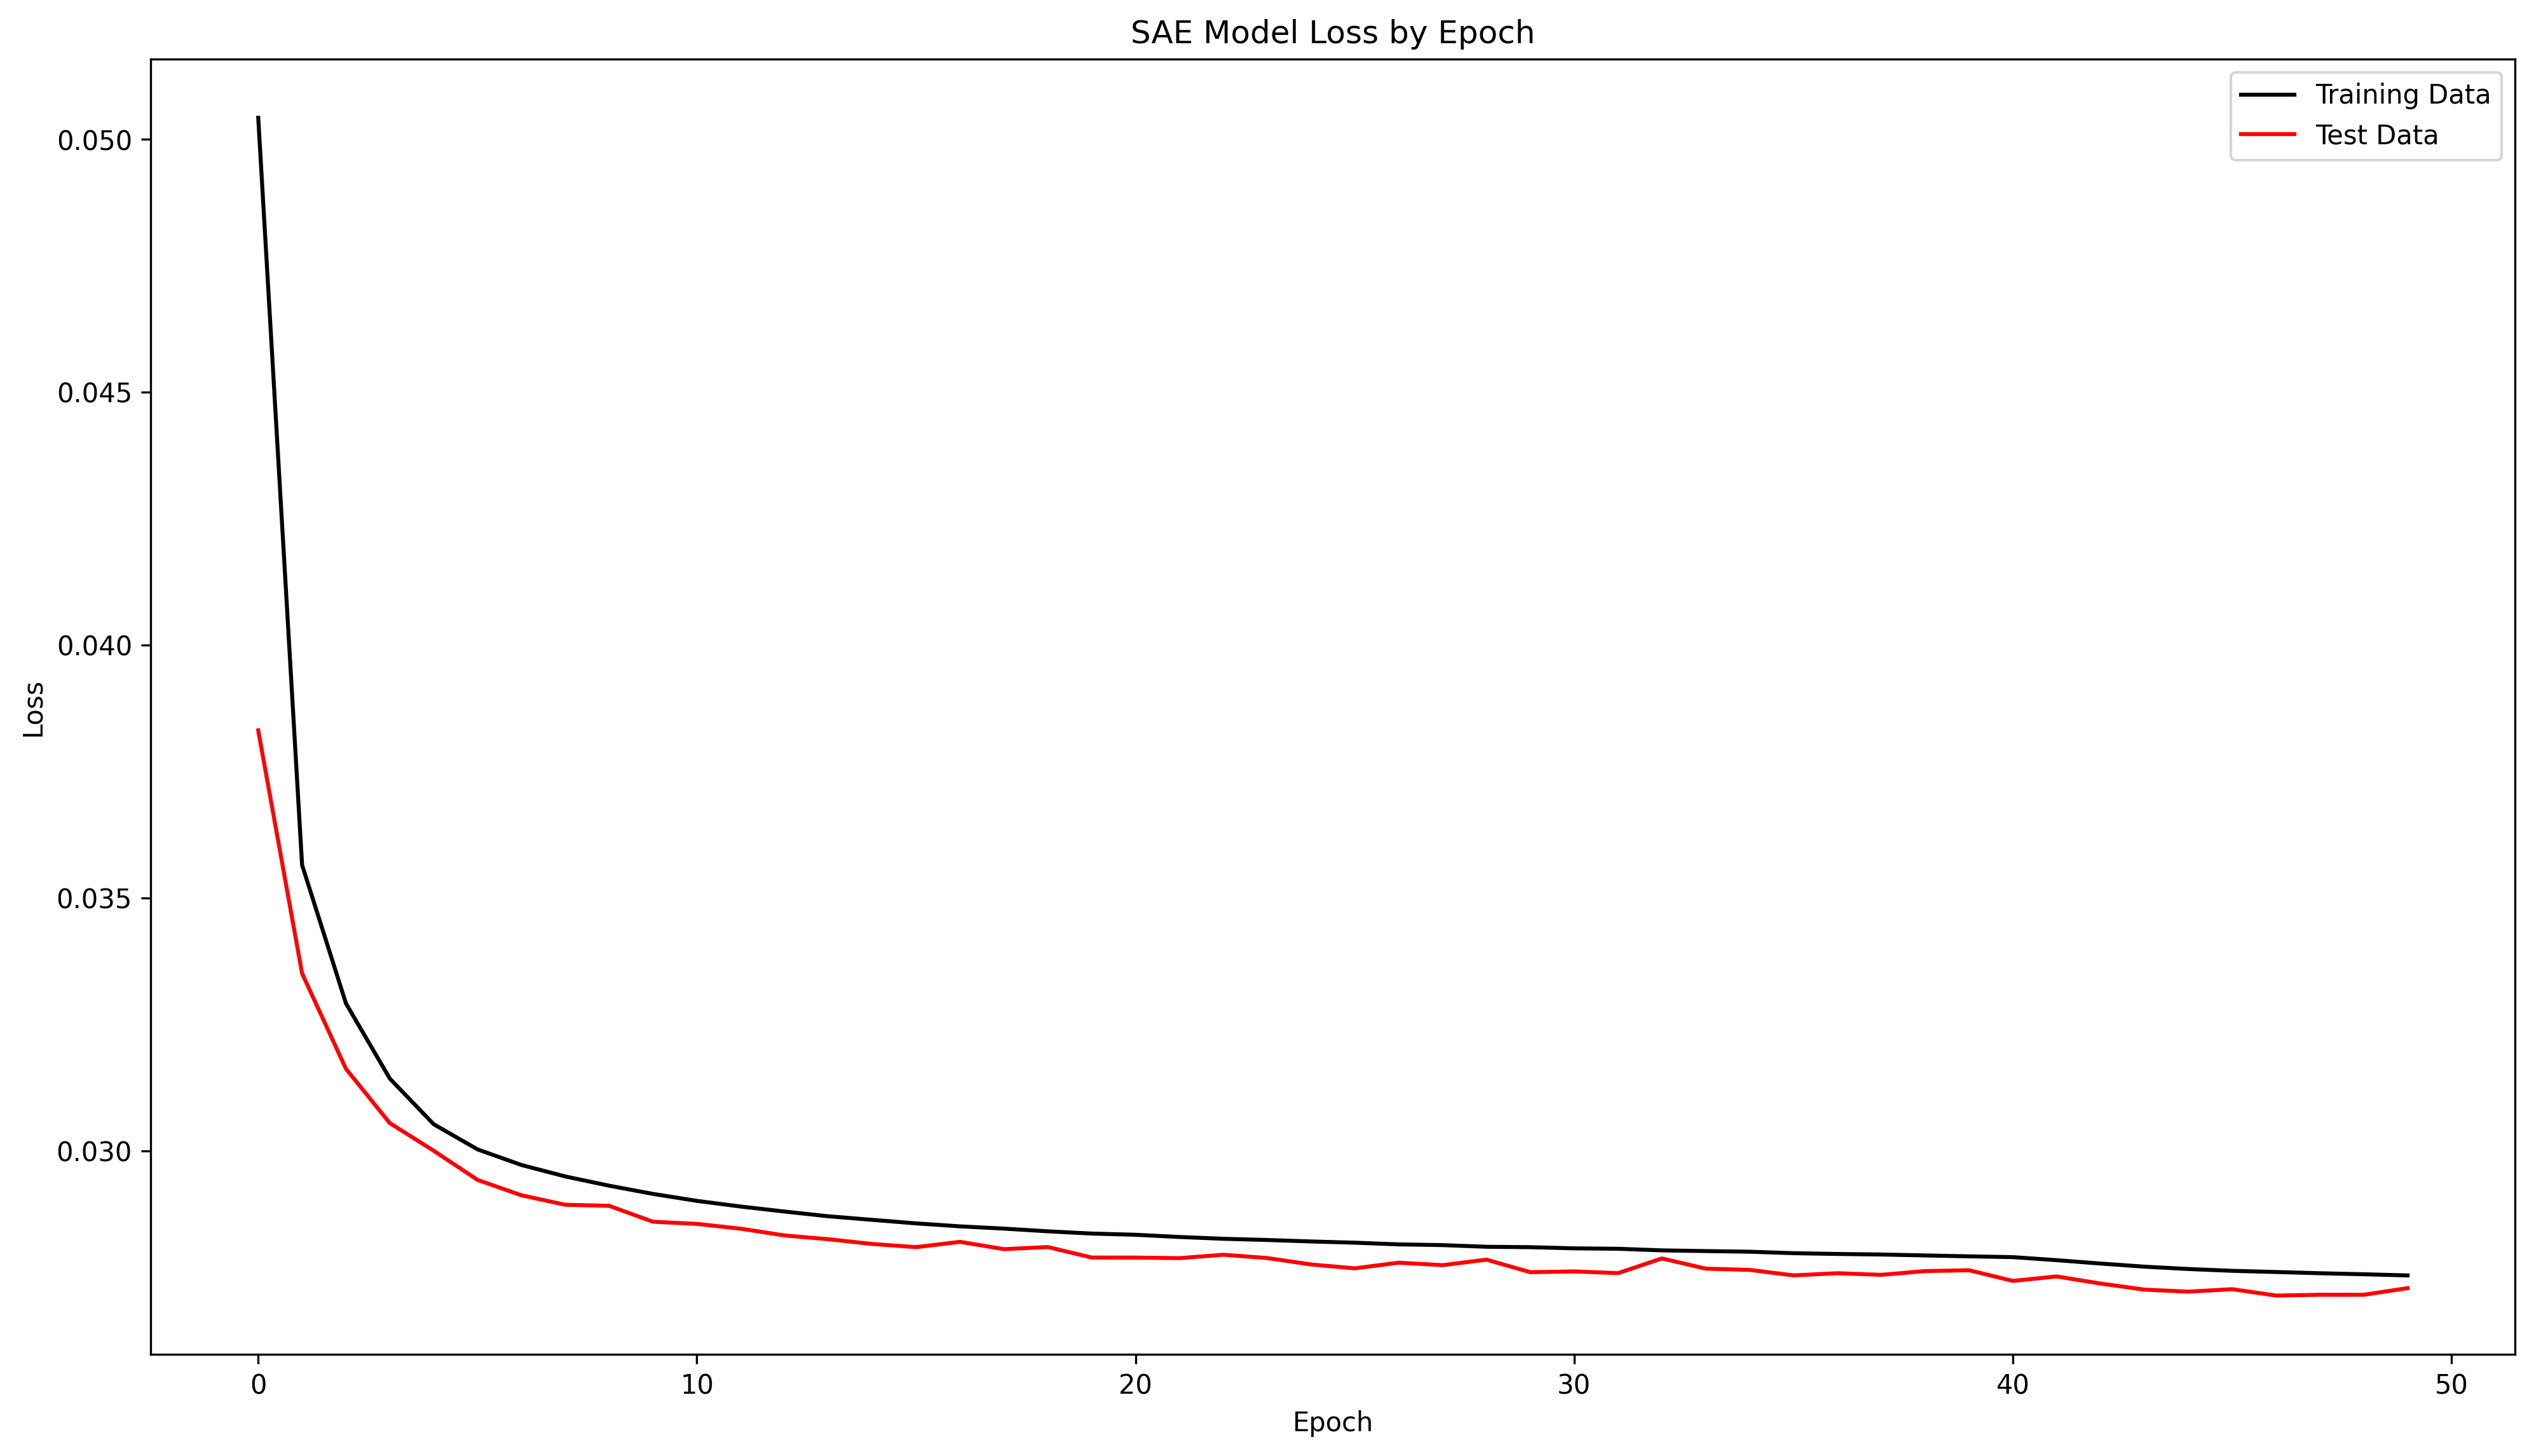

In [5]:
#----------- Build SAE Model ----------#

# Shapes
SAE_n_inputs=X_train.shape[1] #--- No. of neurons for the input and output layers
SAE_n_hidden=16 #--- No. of neurons for the hidden layers (including bottleneck)

# Layers
SAE_visible = Input(shape=(SAE_n_inputs,), name='SAE-Input-Layer') #--- Input-Layer 
SAE_enc_hidden = Dense(units=SAE_n_hidden, activation='relu', name='SAE-Encoder-Hidden-Layer')(SAE_visible) #--- Encoder-Hidden-Layer 
SAE_bottleneck = Dense(units=SAE_n_hidden, activation='relu', activity_regularizer=keras.regularizers.L1(0.0001), name='SAE-Bottleneck-Layer')(SAE_enc_hidden) #--- Bottleneck-Layer
SAE_dec_hidden = Dense(units=SAE_n_hidden, activation='relu', name='SAE-Decoder-Hidden-Layer')(SAE_bottleneck) #--- Decoder-Hidden-Layer 
SAE_output = Dense(units=SAE_n_inputs, activation='sigmoid', name='SAE-Output-Layer')(SAE_dec_hidden) #--- Output-Layer

# Define Sparse autoencoder model
SAE_model = Model(inputs=SAE_visible, outputs=SAE_output, name='Sparse-Autoencoder-Model')

# Compile Sparse autoencoder model
SAE_model.compile(optimizer='adam', loss='mse')

# Print model summary
print(SAE_model.summary())

# Fit the Sparse autoencoder model to reconstruct input
SAE_history = SAE_model.fit(X_train, X_train, epochs=50, batch_size=16, verbose=1, validation_data=(X_test, X_test))

#---------- Plot a loss chart ----------#
fig, ax = plt.subplots(figsize=(16,9), dpi=300)
plt.title(label='SAE Model Loss by Epoch', loc='center')
ax.plot(SAE_history.history['loss'], label='Training Data', color='black')
ax.plot(SAE_history.history['val_loss'], label='Test Data', color='red')
ax.set(xlabel='Epoch', ylabel='Loss')
plt.legend()
plt.show()

#----------- Save SAE Encoder Model ----------#

# Define an encoder model without the decoder
SAE_encoder = Model(inputs=SAE_visible, outputs=SAE_bottleneck)

# Compile encoder model
SAE_encoder.compile(optimizer='adam', loss='mse')

# Save the encoder model to file
SAE_encoder.save(main_dir+'/data/SAE_encoder.h5')

## Comparison

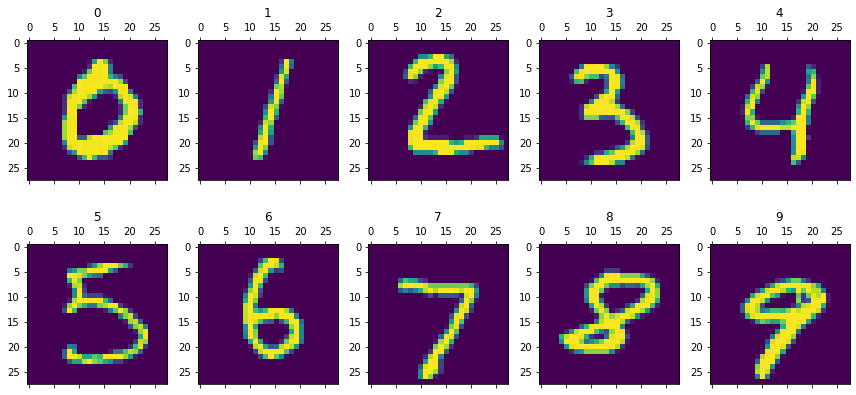

In [6]:
# Reshape back
X_test_back = X_test.reshape(10000, 28, 28)

# Display select images of digits in the testing set and their true lables
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
imglist=[3,2,1,32,4,15,21,0,61,9]
n=0
for i in range(0,2):
    for j in range(0,5):
        k=imglist[n]
        axs[i,j].matshow(X_test_back[k])
        axs[i,j].set(title=y_test[k])
        n=n+1
plt.show() 

In [7]:
imglist=[3,2,1,32,4,15,21,0,61,9]

# Encode images with AE encoder
for i in imglist:
    enc=AE_encoder.predict(X_test[i].reshape(1,784))
    if i==imglist[0]: 
        AE_encoded_imgs=np.copy(enc) 
    else:
        AE_encoded_imgs=np.concatenate((AE_encoded_imgs, enc))
#AE_encoded_imgs

# Encode images with SAE encoder
for i in imglist:
    enc=SAE_encoder.predict(X_test[i].reshape(1,784))
    if i==imglist[0]: 
        SAE_encoded_imgs=np.copy(enc) 
    else:
        SAE_encoded_imgs=np.concatenate((SAE_encoded_imgs, enc))
#SAE_encoded_imgs

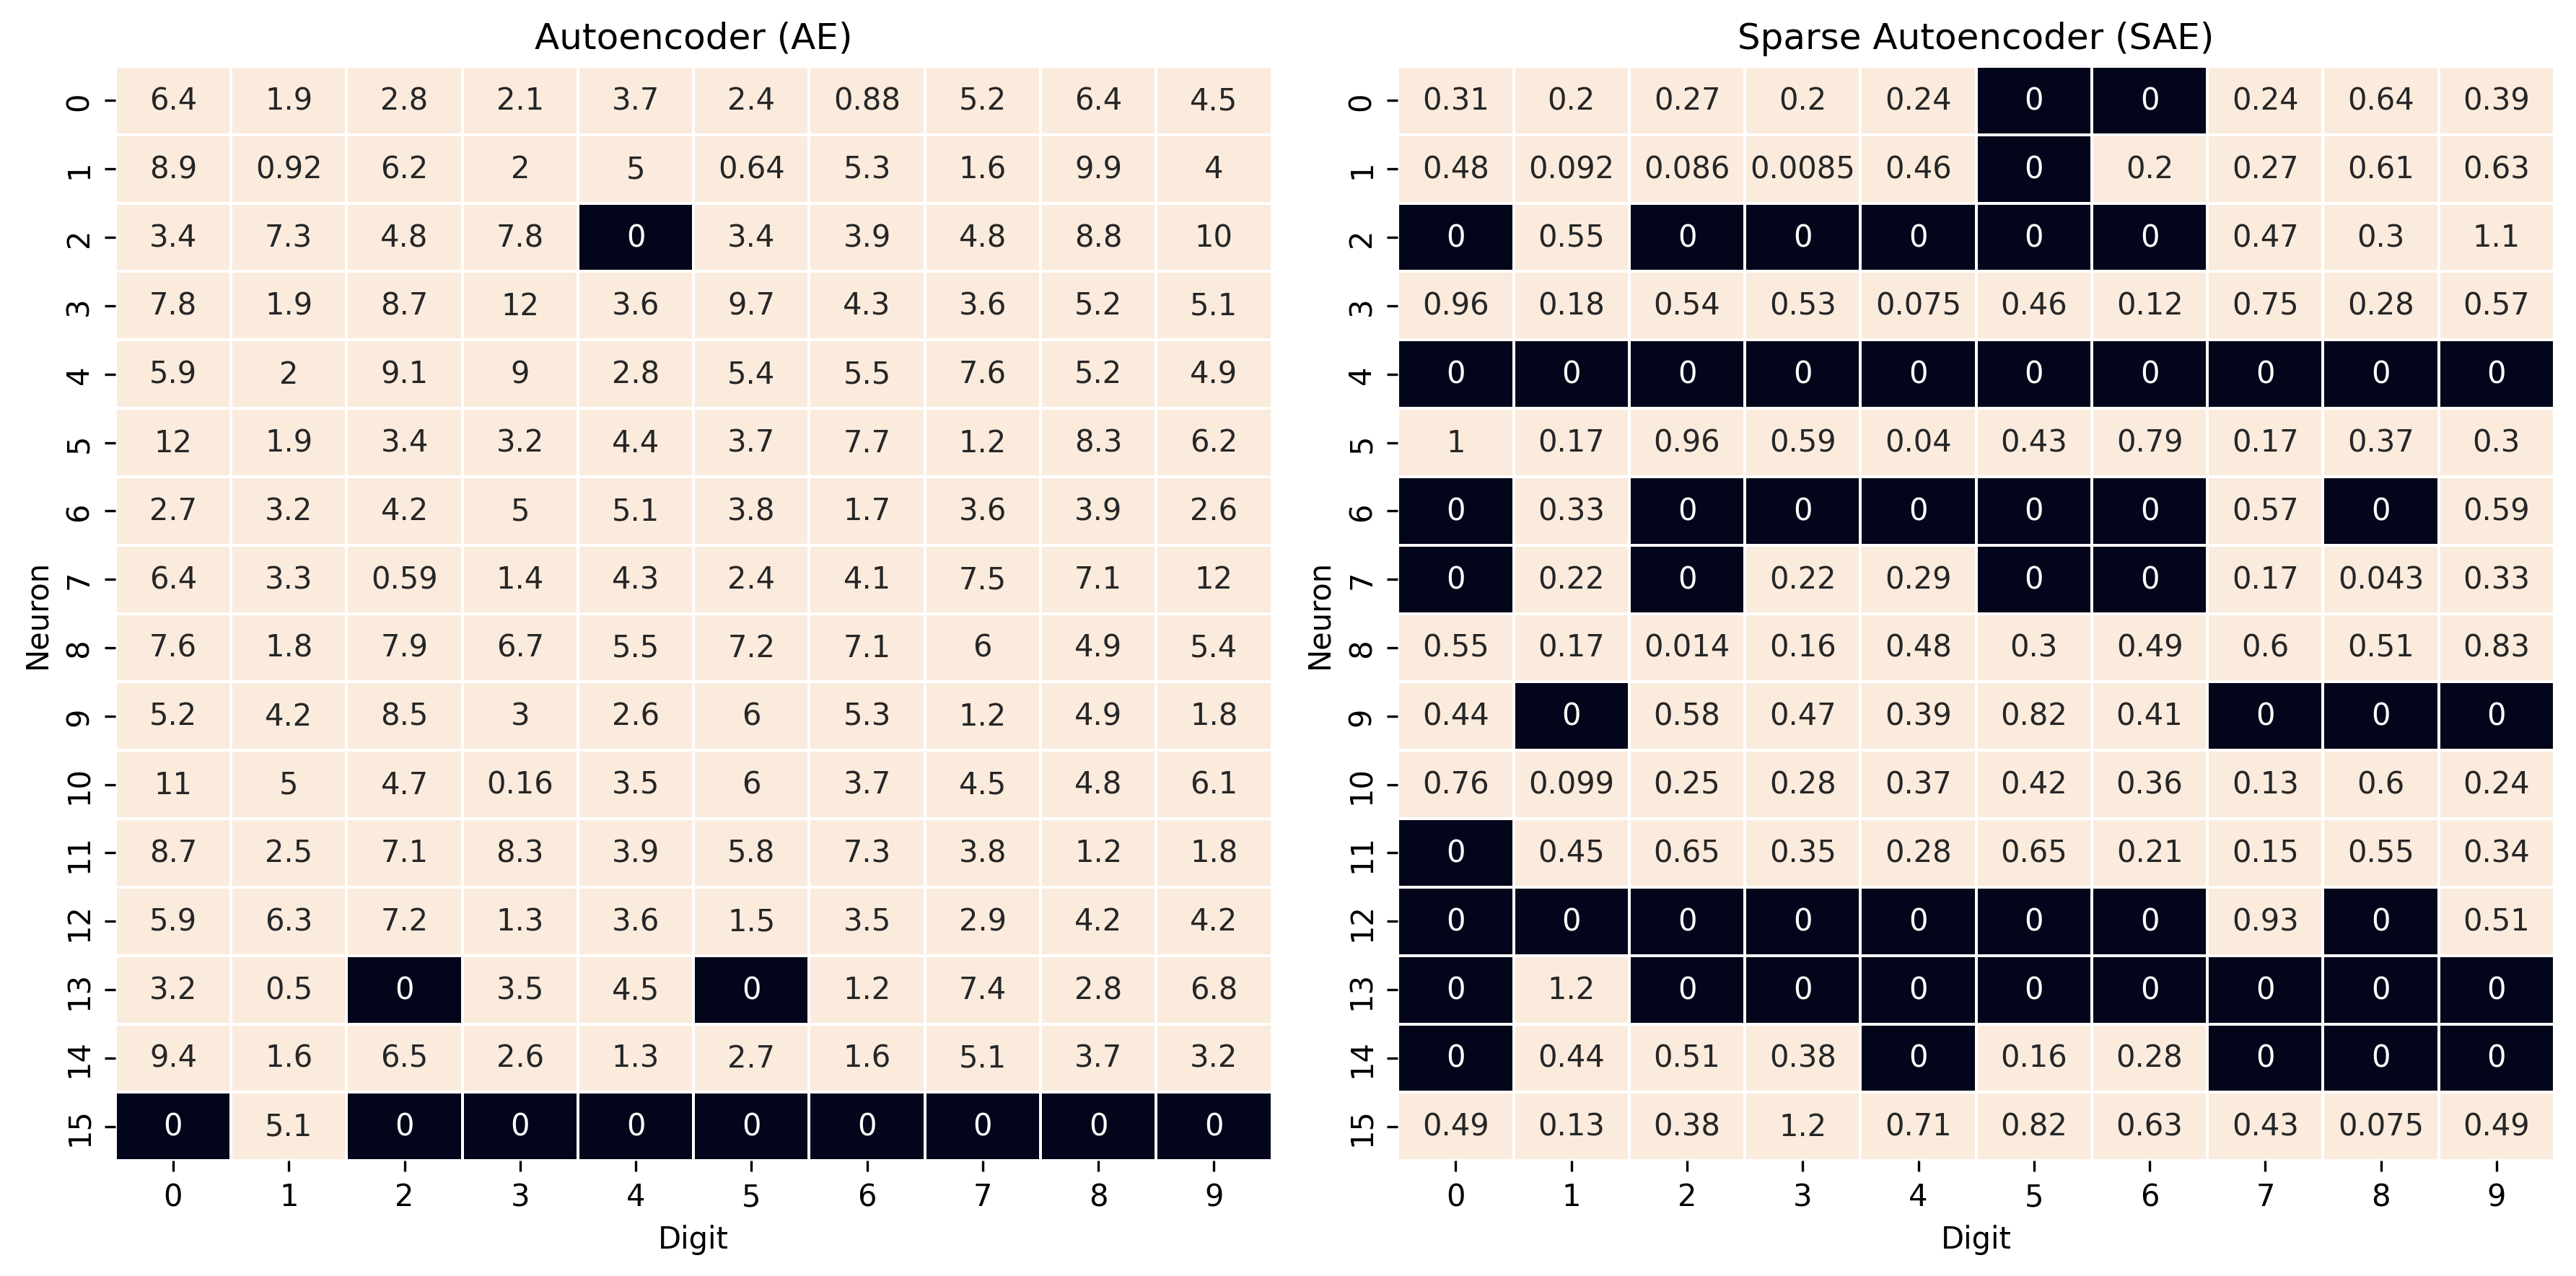

In [8]:
# Plot SNS heatmap
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, sharey=False, tight_layout=True, figsize=(12,6), dpi=300)
sns.heatmap(AE_encoded_imgs.transpose(), linewidth=0.5, annot=True, vmin=0, vmax=0.01, cbar=False, ax=ax1)
sns.heatmap(SAE_encoded_imgs.transpose(), linewidth=0.5, annot=True, vmin=0, vmax=0.00001, cbar=False, ax=ax2)
ax1.set(title='Autoencoder (AE)', xlabel='Digit', ylabel='Neuron')
ax2.set(title='Sparse Autoencoder (SAE)', xlabel='Digit', ylabel='Neuron')
plt.show()